In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#check the distribution of the target variable
data_train['Survived'].value_counts()/len(data_train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Continuous Numerical Varaible

In [11]:
data_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
data_test['Age'].isnull().sum()

86

In [13]:
data_train['Age'].isnull().sum()

177

In [15]:
#calculate the missing value ratio
data_train['Age'].isnull().sum()/len(data_train),data_test['Age'].isnull().sum()/len(data_test)

(0.19865319865319866, 0.20574162679425836)

In [16]:
#imputing missing values from age column of train and test dataset
columns_train=data_train['Age'].values.reshape(-1,1)
columns_test=data_test['Age'].values.reshape(-1,1)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data_train['Age']=imputer.fit_transform(columns_train)
data_test['Age']=imputer.fit_transform(columns_test)


In [17]:
data_train['Age'].isnull().sum(),data_test['Age'].isnull().sum()

(0, 0)

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
#imputing missing fare values in test dataset
columns_test=data_test['Fare'].values.reshape(-1,1)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data_test['Fare']=imputer.fit_transform(columns_test)

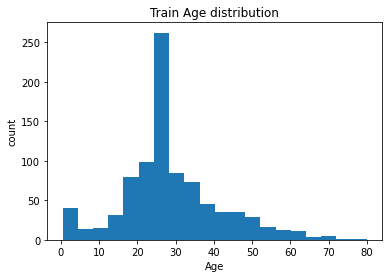

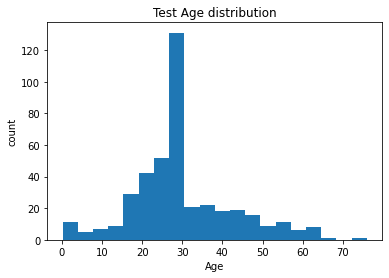

In [21]:
#lets visualise distribution of age train dataset
plt.hist(data_train['Age'],bins=20)
plt.title('Train Age distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

#lets visualise distribution of age of test dataset
plt.hist(data_test['Age'],bins=20)
plt.title('Test Age distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

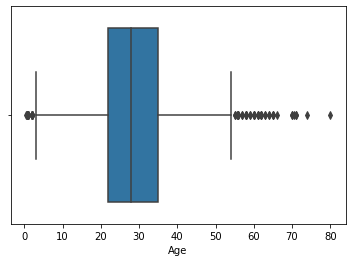

In [22]:
#Create boxplot
sns.boxplot(data_train['Age'])


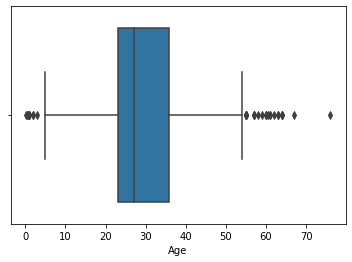

In [23]:
sns.boxplot(data_test['Age'])

In [24]:
#imputing Outliers as we can see there are many outliers in age column
q3=data_train['Age'].quantile(0.75)
q1=data_train['Age'].quantile(0.25)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
def impute_outliers_train(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
    

In [25]:
#imputing outliers for test dataset
q3=data_test['Age'].quantile(0.75)
q1=data_test['Age'].quantile(0.25)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
def impute_outliers_test(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
    

In [26]:
data_train['Age']=data_train['Age'].apply(impute_outliers_train)
data_test['Age']=data_test['Age'].apply(impute_outliers_test)

In [27]:
data_train['Age'].describe()

count    891.000000
mean      29.099888
std       12.017484
min        3.875000
25%       22.000000
50%       28.000000
75%       35.000000
max       54.875000
Name: Age, dtype: float64

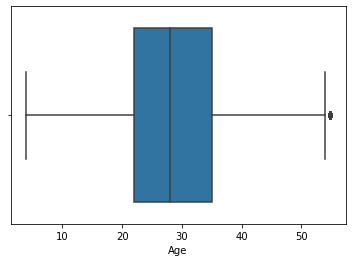

In [28]:
#Create boxplot
sns.boxplot(data_train['Age'])

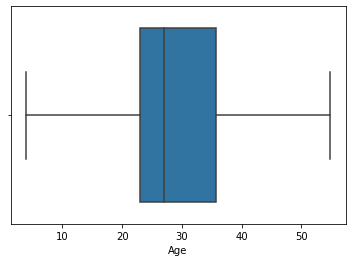

In [29]:
sns.boxplot(data_test['Age'])

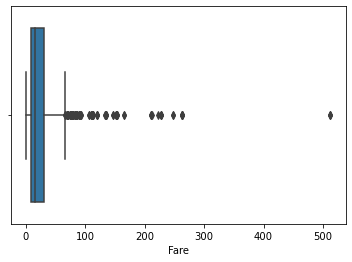

In [30]:
#boxplot for fare before outliers for fare columns
sns.boxplot(data_train['Fare'])

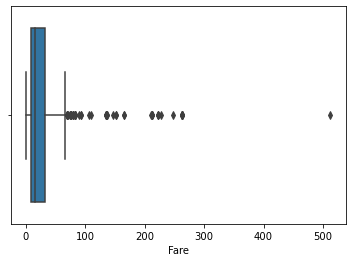

In [31]:
#for test set
sns.boxplot(data_test['Fare'])

In [32]:
#Outliers for fare in train and test set respectively
q3=data_train['Fare'].quantile(0.75)
q1=data_train['Fare'].quantile(0.25)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
def impute_outliers_train(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
    

q3=data_test['Fare'].quantile(0.75)
q1=data_test['Fare'].quantile(0.25)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
def impute_outliers_test(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [33]:
data_train['Fare']=data_train['Fare'].apply(impute_outliers_train)
data_test['Fare']=data_test['Fare'].apply(impute_outliers_test)

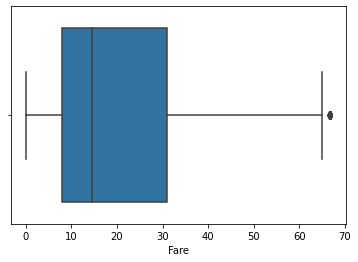

In [34]:
#boxplot for fare after treating outliers
sns.boxplot(data_train['Fare'])

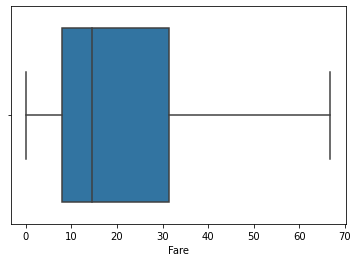

In [35]:
sns.boxplot(data_test['Fare'])

In [36]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Discrete Numeric Variable

In [37]:
data_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [38]:
data_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

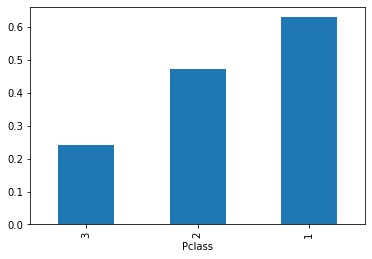

In [39]:
data_train.groupby('Pclass')['Survived'].mean().sort_values().plot(kind='bar')

In [40]:
data_train['SibSp'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: SibSp, dtype: int64

In [41]:
data_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [42]:
data_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

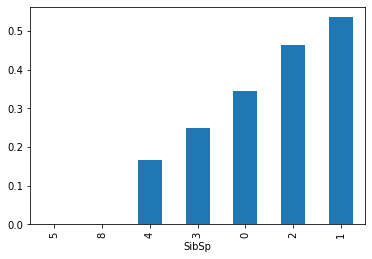

In [43]:
data_train.groupby('SibSp')['Survived'].mean().sort_values().plot(kind='bar')

In [44]:
data_train['Parch'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

In [45]:
data_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [46]:
data_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

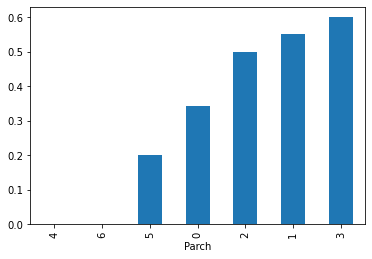

In [47]:
data_train.groupby('Parch')['Survived'].mean().sort_values().plot(kind='bar')

In [48]:
data_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036159,-0.057527,-0.001652,0.003252
Survived,-0.005007,1.000000,-0.338481,-0.059140,-0.035322,0.081629,0.317164
Pclass,-0.035144,-0.338481,1.000000,-0.342360,0.083081,0.018443,-0.714621
Age,0.036159,-0.059140,-0.342360,1.000000,-0.237298,-0.175565,0.146694
SibSp,-0.057527,-0.035322,0.083081,-0.237298,1.000000,0.414838,0.330831
Parch,-0.001652,0.081629,0.018443,-0.175565,0.414838,1.000000,0.290704
Fare,0.003252,0.317164,-0.714621,0.146694,0.330831,0.290704,1.000000


# Feature Generation

In [49]:
#lets create a new column which stores no of relatives of a person on titanic
data_train['Relatives']=data_train['SibSp']+data_train['Parch']
data_test['Relatives']=data_test['SibSp']+data_test['Parch']
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [50]:
#lets create one column to keep record whether the person was alone or not
data_train['Alone']=np.where(data_train['Relatives']>0,'No','Yes')
data_test['Alone']=np.where(data_test['Relatives']>0,'No','Yes')


In [51]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,66.835988,C85,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S,0,Yes


In [52]:
#lets remove SibSp and Parch column from train and test dataset
data_train=data_train.drop(columns=['Parch','SibSp'])
data_test=data_test.drop(columns=['Parch','SibSp'])

In [53]:
data_train.corr()

,PassengerId,Survived,Pclass,Age,Fare,Relatives
PassengerId,1.000000,-0.005007,-0.035144,0.036159,0.003252,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.059140,0.317164,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.342360,-0.714621,0.065997
Age,0.036159,-0.059140,-0.342360,1.000000,0.146694,-0.249894
Fare,0.003252,0.317164,-0.714621,0.146694,1.000000,0.371343
Relatives,-0.040143,0.016639,0.065997,-0.249894,0.371343,1.000000


# Categorical Variable

In [54]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Relatives    891 non-null    int64  
 11  Alone        891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [55]:
#evaluting missing value ratio for cabin column
data_train['Cabin'].isnull().sum()/len(data_train)

0.7710437710437711

In [56]:
##evaluting missing value ratio for embarked column
data_train['Embarked'].isnull().sum()/len(data_train),data_test['Embarked'].isnull().sum()

(0.002244668911335578, 0)

In [57]:
#imputing missing values in embarked column
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data_train['Embarked']=imputer.fit_transform(data_train['Embarked'].values.reshape(-1,1))

In [59]:
data_train['Embarked'].isnull().sum()

0

In [60]:
#we will remove cabin column as it has too many missing values
data_train=data_train.drop(columns=['Cabin'])
data_test=data_test.drop(columns=['Cabin'])

In [61]:
categorical_feature=[feature for feature in data_train.columns if data_train[feature].dtype=='O']
categorical_feature

['Name', 'Sex', 'Ticket', 'Embarked', 'Alone']

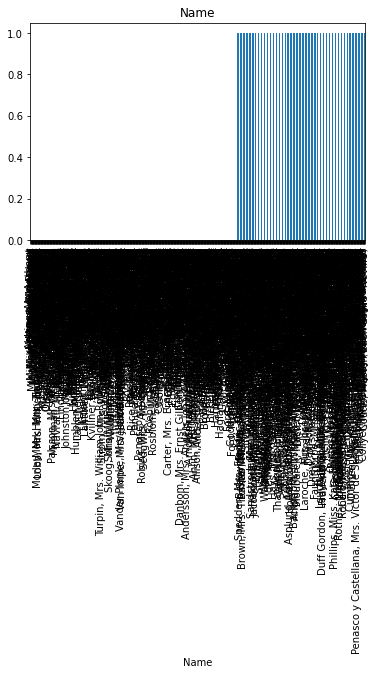

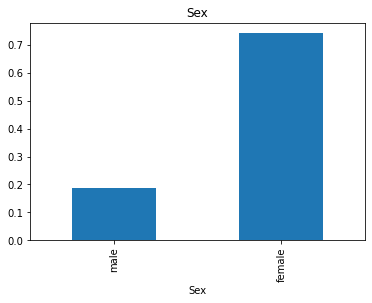

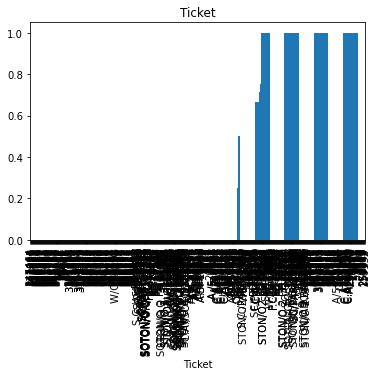

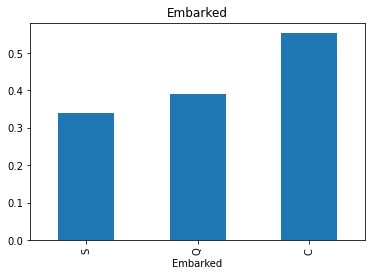

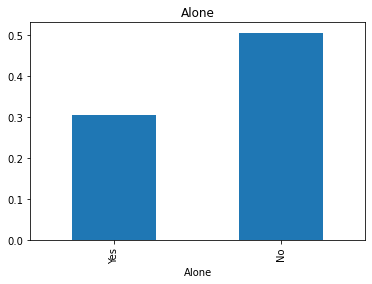

In [62]:
#lets visualise the distribution of each categorical feature
for feature in categorical_feature:
    data_train.groupby(feature)['Survived'].mean().sort_values().plot(kind='bar')
    plt.title(feature)
    plt.show()

In [63]:
#Lets analyse the variance of the categorical features using ANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [64]:
mod=ols('Survived~Sex',data=data_train).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Sex,62.213165,1.0,372.405724,1.406066e-69
Residual,148.514108,889.0,NaN,NaN


In [65]:
mod=ols('Survived~Ticket',data=data_train).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Ticket,181.298701,680.0,1.902549,3.317074e-08
Residual,29.428571,210.0,NaN,NaN


In [66]:
mod=ols('Survived~Alone',data=data_train).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Alone,8.715295,1.0,38.353651,9.009490e-10
Residual,202.011978,889.0,NaN,NaN


In [67]:
mod=ols('Survived~Embarked',data=data_train).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Embarked,6.140761,2.0,13.326871,0.000002
Residual,204.586511,888.0,NaN,NaN


In [68]:
data_train=data_train.drop(columns=['Name','PassengerId','Ticket'])
Test_PassengerId=data_test['PassengerId']
data_test=data_test.drop(columns=['Name','PassengerId','Ticket'])

In [69]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Alone
0,0,3,male,22.0,7.250000,S,1,No
1,1,1,female,38.0,66.835988,C,1,No
2,1,3,female,26.0,7.925000,S,0,Yes
3,1,1,female,35.0,53.100000,S,1,No
4,0,3,male,35.0,8.050000,S,0,Yes


# Dummy Variables

In [70]:
data_train=pd.get_dummies(data=data_train,columns=['Sex','Embarked','Alone'],drop_first=True)
data_test=pd.get_dummies(data=data_test,columns=['Sex','Embarked','Alone'],drop_first=True)

# Scaling

In [71]:
#scaling of train set
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=data_train['Survived']
X=scaler.fit_transform(data_train.drop(columns=['Survived']))
X=pd.DataFrame(data=X,columns=data_train.drop(columns=['Survived']).columns)
X.head()


,Pclass,Age,Fare,Relatives,Sex_male,Embarked_Q,Embarked_S,Alone_Yes
0,0.827377,-0.591128,-0.815491,0.059160,0.737695,-0.307562,0.615838,-1.231645
1,-1.566107,0.741013,2.050823,0.059160,-1.355574,-0.307562,-1.623803,-1.231645
2,0.827377,-0.258093,-0.783021,-0.560975,-1.355574,-0.307562,0.615838,0.811922
3,-1.566107,0.491236,1.390070,0.059160,-1.355574,-0.307562,0.615838,-1.231645
4,0.827377,0.491236,-0.777008,-0.560975,0.737695,-0.307562,0.615838,0.811922


# Checking and removing multicollinearity

In [72]:
X.corr()

,Pclass,Age,Fare,Relatives,Sex_male,Embarked_Q,Embarked_S,Alone_Yes
Pclass,1.000000,-0.342360,-0.714621,0.065997,0.131900,0.221009,0.074053,0.135207
Age,-0.342360,1.000000,0.146694,-0.249894,0.075037,-0.035980,-0.005002,0.168113
Fare,-0.714621,0.146694,1.000000,0.371343,-0.235318,-0.170561,-0.124446,-0.452007
Relatives,0.065997,-0.249894,0.371343,1.000000,-0.200988,-0.058592,0.077359,-0.690922
Sex_male,0.131900,0.075037,-0.235318,-0.200988,1.000000,-0.074115,0.119224,0.303646
Embarked_Q,0.221009,-0.035980,-0.170561,-0.058592,-0.074115,1.000000,-0.499421,0.086464
Embarked_S,0.074053,-0.005002,-0.124446,0.077359,0.119224,-0.499421,1.000000,0.029074
Alone_Yes,0.135207,0.168113,-0.452007,-0.690922,0.303646,0.086464,0.029074,1.000000


In [73]:
k=X.corr()
corelated_columns=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.3))&(i!=j)]
corelated_columns,len(corelated_columns)

([['Fare', 'Relatives'],
  ['Relatives', 'Fare'],
  ['Sex_male', 'Alone_Yes'],
  ['Alone_Yes', 'Sex_male']],
 4)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
#calculating vif for every columns
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])],index=vif_data.columns)
VIF

Pclass        2.990764
Age           1.222886
Fare          3.395609
Relatives     2.493468
Sex_male      1.142977
Embarked_Q    1.496018
Embarked_S    1.476548
Alone_Yes     2.201870
dtype: float64

In [75]:
VIF[VIF==VIF.max()].index[0]

'Fare'

In [76]:
def mc_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range (data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0]," Has been removed")
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present")
        return data
    

In [77]:
for i in range(7):
    vif_data=mc_remover(vif_data)
    
vif_data.head()

No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present


,Pclass,Age,Fare,Relatives,Sex_male,Embarked_Q,Embarked_S,Alone_Yes
0,0.827377,-0.591128,-0.815491,0.059160,0.737695,-0.307562,0.615838,-1.231645
1,-1.566107,0.741013,2.050823,0.059160,-1.355574,-0.307562,-1.623803,-1.231645
2,0.827377,-0.258093,-0.783021,-0.560975,-1.355574,-0.307562,0.615838,0.811922
3,-1.566107,0.491236,1.390070,0.059160,-1.355574,-0.307562,0.615838,-1.231645
4,0.827377,0.491236,-0.777008,-0.560975,0.737695,-0.307562,0.615838,0.811922


# Train test split

In [78]:
X_train=vif_data
y_train=data_train['Survived']

#scaling of test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_test=scaler.fit_transform(data_test)
X_test=pd.DataFrame(data=X_test,columns=data_test.columns)


In [79]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
y_pred=classifier.predict(X_test)

In [81]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
final_answer=pd.DataFrame({'PassengerId':Test_PassengerId,'Survived':y_pred})

In [84]:
gender_submission=pd.read_csv("gender_submission.csv")
y_test=gender_submission['Survived']
gender_submission.head()

,Unnamed: 0,PassengerId,Survived
0,0,892,0
1,1,893,0
2,2,894,0
3,3,895,0
4,4,896,0


In [87]:
classifier.score(X_test,y_test)

1.0

In [88]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [89]:
cm

array([[278,   0],
       [  0, 140]], dtype=int64)

In [95]:
final_answer.to_csv(r'C:\Users\HP\Downloads\titanic\Gender.csv',encoding='utf-8',index=False)